In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import plotly
import plotly.express as px
import plotly.graph_objs as gobj
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from plotly import figure_factory as FF

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering


# Upload the CSV file
uploaded = files.upload()

# Define the function to load and display data with specified encoding
def load_data(filepath):
    # Read the CSV file with a specific encoding
    data = pd.read_csv(filepath, encoding='ISO-8859-1')

    # Print column names to confirm the CSV structure
    print("Columns in CSV:", data.columns)

    # Print the first few rows of the data to verify content
    print("Sample data:")
    print(data.head())

    # Convert data into a list of dictionaries (one for each row) for flexibility
    return data.to_dict(orient="records")

# Load the data (use the exact name of the uploaded file)
train_data = load_data("Sample - Superstore.csv")

# Optional: Print the first 5 records of train_data to verify the structure
print("Sample records:", train_data[:5])


In [ ]:
# import pandas as pd
# from google.colab import files

# # Upload the CSV file
# uploaded = files.upload()

# Define the function to load and display data with specified encoding
def load_data(filepath):
    # Read the CSV file with a specific encoding
    data = pd.read_csv(filepath, encoding='ISO-8859-1')

    # Print column names to confirm the CSV structure
    print("Columns in CSV:", data.columns)

    # Print the first few rows of the data to verify content
    print("Sample data:")
    print(data.head())

    return data

# Load the data (use the exact name of the uploaded file)
data = load_data("Sample - Superstore.csv")

# Convert 'Order Date' column to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

# Add new columns for year, month, and day based on the 'Order Date' column
data["year"] = data["Order Date"].dt.year
data["month"] = data["Order Date"].dt.month_name()
data["day"] = data["Order Date"].dt.day_name()

# Print a sample of the new columns to verify
print(data[["year", "month", "day"]].head())


Columns in CSV: Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
Sample data:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  Uni

In [ ]:
orders_by_state = data.groupby('State')['Order ID'].nunique().reset_index(name='count').sort_values(['count'],ascending=False)

fig = px.treemap(orders_by_state,path=['State'],values='count',width=950,height=700);
fig.update_layout(title_text='Total Orders by State',title_x=0.5,title_font=dict(size=25));
fig.update_layout(margin=dict(t=50,l=25,r=25,b=25),paper_bgcolor="black",font=dict(color="white",size=18));
fig.data[0].textinfo = 'label+value+percent parent'

plt.tight_layout();
fig.show();

<Figure size 800x550 with 0 Axes>

In [ ]:
items_by_state = data.groupby('State')['Quantity'].sum().reset_index(name='items sold').sort_values(['items sold'],ascending=False)

fig = px.treemap(items_by_state,path=['State'],values='items sold',width=950,height=700);
fig.update_layout(title_text='Total Items Sold by State',title_x=0.5,title_font=dict(size=25));
fig.update_layout(margin=dict(t=50,l=25,r=25,b=25),paper_bgcolor="black",font=dict(color="white",size=18));
fig.data[0].textinfo = 'label+value+percent parent'

plt.tight_layout();
fig.show();

<Figure size 800x550 with 0 Axes>

In [ ]:
import us  # Import the `us` library to easily convert state names to abbreviations
from google.colab import drive
import pandas as pd
import plotly.express as px

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Correct file path
filepath = '/content/drive/My Drive/Sample - Superstore.csv'

# Load data
data = pd.read_csv(filepath, encoding='ISO-8859-1')

# Ensure 'Order Date' is parsed as a date
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

# Calculate profit margin per row and then aggregate by state
data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100
data = data.dropna(subset=['Profit Margin'])  # Drop rows with NaN values in 'Profit Margin'

# Map full state names to abbreviations
state_abbr = {state.name: state.abbr for state in us.states.STATES}
data['State'] = data['State'].map(state_abbr)

# Aggregate the average profit margin by state
state_profit_margin = data.groupby('State')['Profit Margin'].mean().reset_index()

# Create an interactive choropleth map
fig = px.choropleth(
    state_profit_margin,
    locations="State",
    locationmode="USA-states",
    color="Profit Margin",
    hover_name="State",
    hover_data={"Profit Margin": ":.2f"},
    color_continuous_scale="Viridis",
    scope="usa",
    title="Average Profit Margin by State"
)

# Show the map
fig.show()


Mounted at /content/drive


<ipython-input-25-cb09f873567f>:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-25-cb09f873567f>:35: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




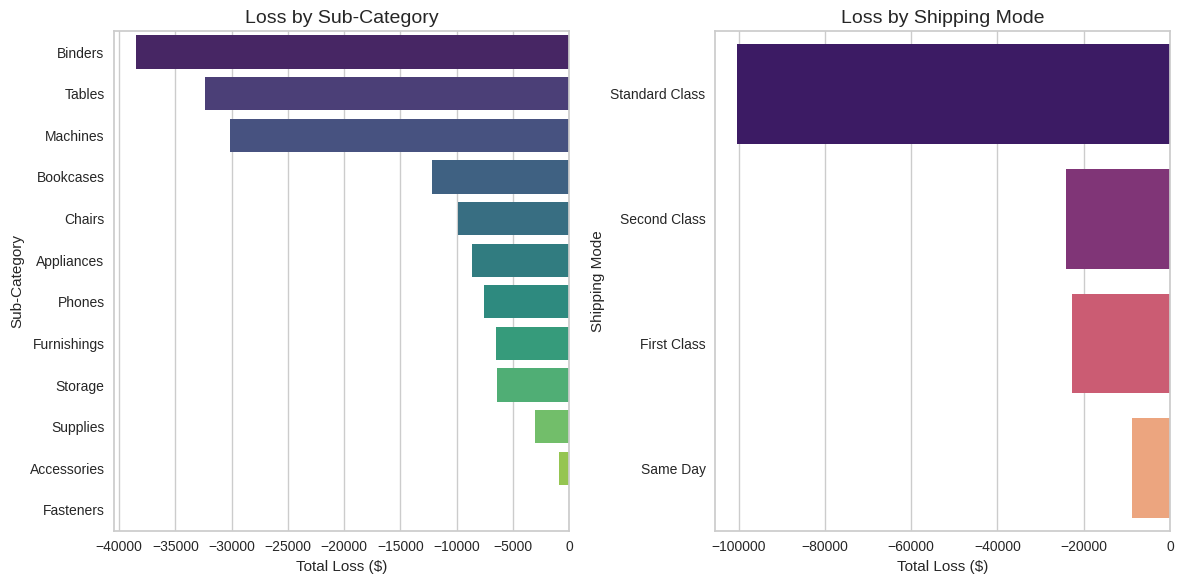

Top Loss-Making Sub-Categories:
   Sub-Category      Profit
2       Binders -38510.4964
11       Tables -32412.1483
7      Machines -30118.6682
3     Bookcases -12152.2060
4        Chairs  -9880.8413

Losses by Shipping Mode:
        Ship Mode       Profit
3  Standard Class -100348.5365
2    Second Class  -24224.3729
0     First Class  -22660.2709
1        Same Day   -8898.1054

Average Discount on Loss Orders: 48.09%
Percentage of Orders with Loss: 18.72%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(filepath, encoding='ISO-8859-1')

# Filter negative profit orders
negative_profit_orders = data[data['Profit'] < 0]

# Top loss-making sub-categories
loss_by_subcategory = negative_profit_orders.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit')

# Losses by shipping mode
loss_by_ship_mode = negative_profit_orders.groupby('Ship Mode')['Profit'].sum().reset_index().sort_values(by='Profit')

# Average discount on negative profit orders
avg_discount_on_loss_orders = negative_profit_orders['Discount'].mean() * 100

# Percentage of loss orders
percentage_loss_orders = (len(negative_profit_orders) / len(data)) * 100

# Visualizations
plt.figure(figsize=(12, 6))

# Plot 1: Loss by Sub-Category
plt.subplot(1, 2, 1)
sns.barplot(data=loss_by_subcategory, x='Profit', y='Sub-Category', palette='viridis')
plt.title('Loss by Sub-Category', fontsize=14)
plt.xlabel('Total Loss ($)')
plt.ylabel('Sub-Category')

# Plot 2: Loss by Shipping Mode
plt.subplot(1, 2, 2)
sns.barplot(data=loss_by_ship_mode, x='Profit', y='Ship Mode', palette='magma')
plt.title('Loss by Shipping Mode', fontsize=14)
plt.xlabel('Total Loss ($)')
plt.ylabel('Shipping Mode')

plt.tight_layout()
plt.show()

# Print insights
print("Top Loss-Making Sub-Categories:")
print(loss_by_subcategory.head())

print("\nLosses by Shipping Mode:")
print(loss_by_ship_mode)

print(f"\nAverage Discount on Loss Orders: {avg_discount_on_loss_orders:.2f}%")
print(f"Percentage of Orders with Loss: {percentage_loss_orders:.2f}%")


In [ ]:
import pandas as pd
import plotly.express as px

# Load the dataset
data = pd.read_csv(filepath, encoding='ISO-8859-1')

# Define the states of interest
states_of_interest = ['Iowa', 'Arkansas', 'Texas', 'Illinois']
figures = []

for state in states_of_interest:
    # Filter data by the current state and calculate total profit by category
    state_data = data[data['State'] == state].groupby('Category')['Profit'].sum().reset_index(name='total_profit')
    state_data = state_data.sort_values(by='total_profit', ascending=False)

    # Create the treemap plot
    fig = px.treemap(
        state_data,
        path=[px.Constant(state), 'Category'],
        values='total_profit',
        title=f"Most Profitable Categories in {state}",
        width=950,
        height=700
    )

    # Customize layout and appearance
    fig.update_layout(
        title_x=0.5,
        title_font=dict(size=25),
        margin=dict(t=50, l=25, r=25, b=25),
        paper_bgcolor="black",
        font=dict(color="white", size=18)
    )
    fig.data[0].textinfo = 'label+value+percent parent'

    # Show or store the figure
    figures.append(fig)

# Display figures (for inline display in a Jupyter notebook)
for fig in figures:
    fig.show()
